<a href="https://colab.research.google.com/github/mohameddhameem/TensorflowCertification/blob/main/Advanced_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashon MNIST with TF Estimator

In [ ]:
import os
import tensorflow as tf
import numpy as np

In [ ]:
LABEL_DIMENSION = 10

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
TRAINING_SIZE = len(train_images)
TEST_SIZE = len(test_images)

#Normalize the image
train_images = np.asarray(train_images, dtype=np.float32) / 255
# Convert the train images and add channels
train_images = train_images.reshape((TRAINING_SIZE, 28, 28, 1))
test_images = np.asarray(test_images, dtype=np.float32) / 255
# Convert the train images and add channels
test_images = test_images.reshape((TEST_SIZE, 28, 28, 1))

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
train_labels = tf.keras.utils.to_categorical(train_labels, LABEL_DIMENSION)
test_labels = tf.keras.utils.to_categorical(test_labels, LABEL_DIMENSION)

train_labels = train_labels.astype(np.float32)
test_labels = test_labels.astype(np.float32)
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 28, 28, 1) (60000, 10)
(10000, 28, 28, 1) (10000, 10)


In [ ]:
inputs = tf.keras.Input(shape=(28,28,1))  
x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(inputs)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2)(x)
x = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2)(x)
x = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
predictions = tf.keras.layers.Dense(LABEL_DIMENSION, activation='softmax')(x)
model = tf.keras.Model(inputs=inputs, outputs=predictions)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0     

In [ ]:
optimizer = tf.keras.optimizers.SGD()
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics = ["accuracy"])
#Run the model first in CPU
statergy = None
config = tf.estimator.RunConfig(train_distribute=statergy)
estimator = tf.keras.estimator.model_to_estimator(model, config=config)

INFO:tensorflow:Using the Keras model provided.


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/backend.py:434: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpryomh8ix', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [ ]:
#Now Train input func
def input_fn(images, labels, epochs, batch_size):
  dataset = tf.data.Dataset.from_tensor_slices((images, labels))
  SHUFFLE_SIZE = 5000
  dataset = dataset.shuffle(SHUFFLE_SIZE).repeat(epochs).batch(batch_size)
  dataset = dataset.prefetch(None)
  return dataset

BATCH_SIZE = 512
EPOCHS = 50

estimator_train_result = estimator.train(
    input_fn=lambda:input_fn(train_images, train_labels,
                 epochs=EPOCHS,
                 batch_size=BATCH_SIZE))
print(estimator_train_result)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Warm-starting with WarmStartSettings: WarmStartSettings(ckpt_to_initialize_from='/tmp/tmpryomh8ix/keras/keras_model.ckpt', vars_to_warm_start='.*', var_name_to_vocab_info={}, var_name_to_prev_var_name={})
INFO:tensorflow:Warm-starting from: /tmp/tmpryomh8ix/keras/keras_model.ckpt
INFO:tensorflow:Warm-starting variables only in TRAINABLE_VARIABLES.


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/backend.py:434: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


INFO:tensorflow:Warm-started 10 variables.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpryomh8ix/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 2.2988827, step = 0
INFO:tensorflow:global_step/sec: 81.3365
INFO:tensorflow:loss = 2.261888, step = 100 (1.234 sec)
INFO:tensorflow:global_step/sec: 82.2413
INFO:tensorflow:loss = 2.1436188, step = 200 (1.212 sec)
INFO:tensorflow:global_step/sec: 86.4494
INFO:tensorflow:loss = 1.4679319, step = 300 (1.160 sec)
INFO:tensorflow:global_step/sec: 56.6582
INFO:tensorflow:loss = 1.0190237, step = 400 (1.765 sec)
INFO:tensorflow:global_step/sec: 56.2691
INFO:tensorflow:loss = 0.959388, step = 500 (1.774 sec)
INFO:tensorflow:global_step/sec: 62.71

In [ ]:
estimator.evaluate(lambda:input_fn(test_images, 
                                   test_labels,
                                   epochs=1,
                                   batch_size=BATCH_SIZE))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-01-04T10:21:19Z


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/backend.py:434: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpryomh8ix/model.ckpt-5860
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.38898s
INFO:tensorflow:Finished evaluation at 2021-01-04-10:21:20
INFO:tensorflow:Saving dict for global step 5860: accuracy = 0.8369, global_step = 5860, loss = 0.45152998
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5860: /tmp/tmpryomh8ix/model.ckpt-5860


{'accuracy': 0.8369, 'global_step': 5860, 'loss': 0.45152998}

# Train with GPU

In [ ]:
statergy = tf.distribute.MirroredStrategy()
config = tf.estimator.RunConfig(train_distribute=statergy)

BATCH_SIZE = 512
EPOCHS = 50

estimator_train_result = estimator.train(
    input_fn=lambda:input_fn(train_images, train_labels,
                 epochs=EPOCHS,
                 batch_size=BATCH_SIZE))
print(estimator_train_result)

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Initializing RunConfig with distribution strategies.
INFO:tensorflow:Not using Distribute Coordinator.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/backend.py:434: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpryomh8ix/model.ckpt-5860
Instructions for updating:
Use standard file utilities to get mtimes.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 5860...
INFO:tensorflow:Saving checkpoints for 5860 into /tmp/tmpryomh8ix/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 5860...
INFO:tensorflow:loss = 0.43825153, step = 5860
INFO:tensorflow:global_step/sec: 96.2378
INFO:tensorflow:loss = 0.4445541, step = 5960 (1.042 sec)
INFO:tensorflow:global_step/sec: 109.02
INFO:tensorflow:loss = 0.39936605, step = 6060 (0.917 sec)
INFO:tensorflow:global_step/sec: 109.517
INFO:tensorflow:loss = 0.44387645, step = 6160 (0.912 sec)
INFO:tensorflow:global_step/sec: 108.922
INFO:tensorflow:loss = 0.32173693, step = 6260 (0.919 sec)
INFO:tensorflow:global_step/sec: 108.189
INFO:tensorflow:

In [ ]:
estimator.evaluate(lambda:input_fn(test_images, 
                                   test_labels,
                                   epochs=1,
                                   batch_size=BATCH_SIZE))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-01-04T10:25:03Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpryomh8ix/model.ckpt-11720


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/backend.py:434: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.34559s
INFO:tensorflow:Finished evaluation at 2021-01-04-10:25:04
INFO:tensorflow:Saving dict for global step 11720: accuracy = 0.857, global_step = 11720, loss = 0.401994
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 11720: /tmp/tmpryomh8ix/model.ckpt-11720


{'accuracy': 0.857, 'global_step': 11720, 'loss': 0.401994}

# Transfer Learning with TF v2.x

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers, models

base_model = InceptionV3(weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 0s 0us/step


In [ ]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, None, None, 3 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d_3[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [ ]:
x = base_model.output
# let's add a fully connected layer as first layer
x = layers.Dense(1024, activation='relu')(x)
# and a logistic layer with 200 classes as last layer
predictions = layers.Dense(200, activation='softmax')(x)
# model to train
model = models.Model(inputs=base_model.input, outputs=predictions)

# Transfer learning for classifying horses and humans

In [ ]:
import os
import time
import tensorflow as tf
import numpy as np
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
SPLIT_WEIGHTS = (8, 1, 1)
#tfds.Split.TRAIN.split()
splits = tfds.Split.TRAIN.subsplit(weighted=SPLIT_WEIGHTS)
(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'horses_or_humans', split=list(splits),
    with_info=True, as_supervised=True)

AttributeError: ignored

In [ ]:
# workaround for above error 
(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'horses_or_humans', split=[
                               "train[:80%]","train[80%:90%]","train[90%:]"
    ],
    with_info=True, as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/horses_or_humans/3.0.0.incompleteVISKNP/horses_or_humans-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/horses_or_humans/3.0.0.incompleteVISKNP/horses_or_humans-test.tfrecord


Dataset horses_or_humans downloaded and prepared to /root/tensorflow_datasets/horses_or_humans/3.0.0. Subsequent calls will reuse this data.


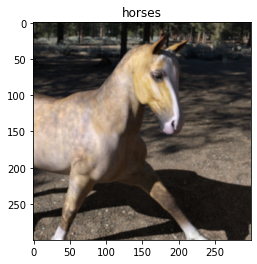

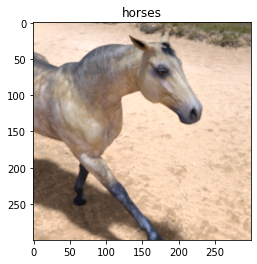

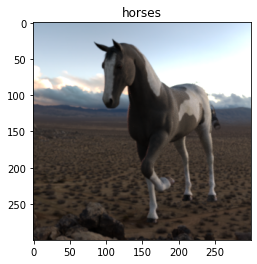

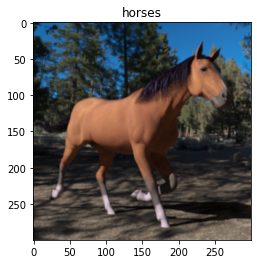

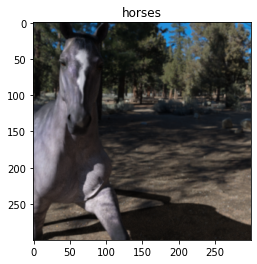

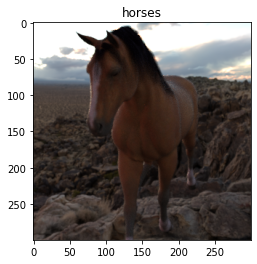

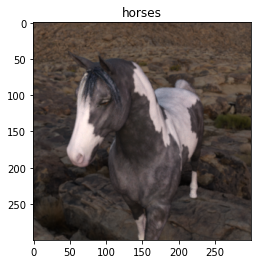

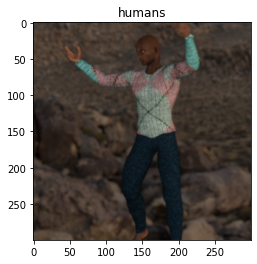

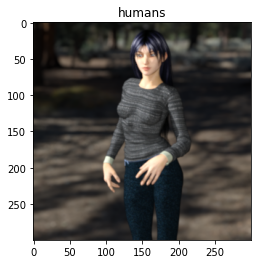

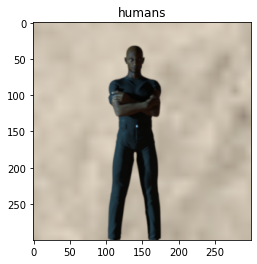

In [ ]:
get_label_name = metadata.features['label'].int2str
def show_images(dataset): 
  for image, label in dataset.take(10):
    plt.figure()
    plt.imshow(image)
    plt.title(get_label_name(label))
show_images(raw_train)

In [ ]:
IMG_SIZE = 160 # All images will be resized to 160x160
def format_example(image, label):
  image = tf.cast(image, tf.float32)
  image = (image/127.5) - 1
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
  return image, label
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

In [ ]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 2000
train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

In [ ]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                  include_top=False,
                                  weights='imagenet')
base_model.trainable = False
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         input_5[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 80, 80, 32)   0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [ ]:
for image_batch, label_batch in train_batches.take(1):
  pass
print (image_batch.shape)
# Expected (32, 160, 160, 3)

(32, 160, 160, 3)


In [ ]:
#MobileNetV2 transforms each 160×160×3 image into a 5×5×1280 block of features.
feature_batch = base_model(image_batch)
print(feature_batch.shape)
# Expected (32, 5, 5, 1280)

(32, 5, 5, 1280)


In [ ]:
# use GlobalAveragePooling2D() to average over the spatial 5×5 spatial locations and obtain a size of (32, 1280)
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


In [ ]:
#last layer is dense with linear activation:
#if the prediction is positive, the class is 1; if the prediction is negative, the class is 0
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 1)


In [ ]:
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
num_train, num_val, num_test = (
  metadata.splits['train'].num_examples*weight/10
  for weight in SPLIT_WEIGHTS
)
initial_epochs = 10
steps_per_epoch = round(num_train)//BATCH_SIZE
validation_steps = 4
loss0,accuracy0 = model.evaluate(validation_batches, steps = validation_steps)

4/4 [==============================] - 2s 88ms/step - loss: 7.1767 - accuracy: 0.3250


In [ ]:
history = model.fit(train_batches,
                    epochs=initial_epochs,
                    validation_data=validation_batches)

Epoch 1/10
26/26 [==============================] - 6s 51ms/step - loss: 5.2010 - accuracy: 0.4258 - val_loss: 3.9519 - val_accuracy: 0.5392
Epoch 2/10
26/26 [==============================] - 4s 45ms/step - loss: 3.6161 - accuracy: 0.5852 - val_loss: 2.6513 - val_accuracy: 0.6275
Epoch 3/10
26/26 [==============================] - 4s 45ms/step - loss: 2.9231 - accuracy: 0.6642 - val_loss: 2.0599 - val_accuracy: 0.7059
Epoch 4/10
26/26 [==============================] - 4s 45ms/step - loss: 2.2200 - accuracy: 0.7275 - val_loss: 1.7019 - val_accuracy: 0.7451
Epoch 5/10
26/26 [==============================] - 4s 45ms/step - loss: 1.8416 - accuracy: 0.7737 - val_loss: 1.1610 - val_accuracy: 0.8137
Epoch 6/10
26/26 [==============================] - 4s 45ms/step - loss: 1.4665 - accuracy: 0.8187 - val_loss: 0.7814 - val_accuracy: 0.8529
Epoch 7/10
26/26 [==============================] - 4s 46ms/step - loss: 1.0223 - accuracy: 0.8808 - val_loss: 0.4410 - val_accuracy: 0.9216
Epoch 8/10
26

# TF Hub

In [ ]:
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import PIL.Image as Image
classifier_url ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2" #@param {type:"string"}
IMAGE_SHAPE = (224, 224)
# wrap the hub to work with tf.keras
classifier = tf.keras.Sequential([
    hub.KerasLayer(classifier_url, input_shape=IMAGE_SHAPE+(3,))
])
grace_hopper = tf.keras.utils.get_file('image.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg')
grace_hopper = Image.open(grace_hopper).resize(IMAGE_SHAPE)
grace_hopper = np.array(grace_hopper)/255.0
result = classifier.predict(grace_hopper[np.newaxis, ...])
predicted_class = np.argmax(result[0], axis=-1)
print (predicted_class)

65536/61306 [================================] - 0s 0us/step
653


# Visual Q & A

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
# IMAGE
#
# Define CNN for visual processing
cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D(2, 2))
cnn_model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
cnn_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D(2, 2))
cnn_model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
cnn_model.add(layers.Conv2D(256, (3, 3), activation='relu'))
cnn_model.add(layers.Conv2D(256, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D(2, 2))
cnn_model.add(layers.Flatten())
cnn_model.summary()
# define the visual_model with proper input
image_input = layers.Input(shape=(224, 224, 3))
visual_model = cnn_model(image_input)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 222, 222, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 111, 111, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 109, 109, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 54, 54, 256)       2

In [2]:
# TEXT
#
# define the RNN model for text processing
question_input = layers.Input(shape=(100,), dtype='int32')
emdedding = layers.Embedding(input_dim=10000, output_dim=256, input_length=100)(question_input)
encoded_question = layers.LSTM(256)(emdedding)

In [3]:
# combine the encoded question and visual model
merged = layers.concatenate([encoded_question, visual_model])
# attach a dense network at the end
output = layers.Dense(1000, activation='softmax')(merged)
# get the combined model
vqa_model = models.Model(inputs=[image_input, question_input], outputs=output)
vqa_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 100, 256)     2560000     input_2[0][0]                    
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
lstm (LSTM)                     (None, 256)          525312      embedding[0][0]                  
______________________________________________________________________________________________

# Deep Dream

https://github.com/pukkapies/applied-dl/blob/master/examples/9-deep-dream-minimal.ipynb

In [4]:
import numpy as np
import tensorflow as tf

from IPython.display import clear_output
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing import image

Original Image
Processed image


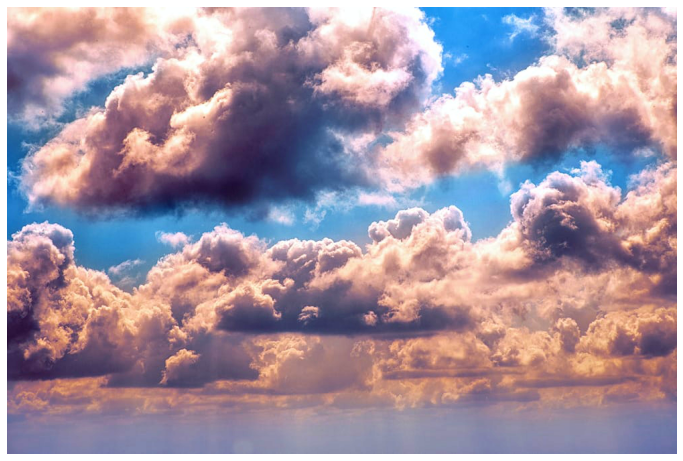

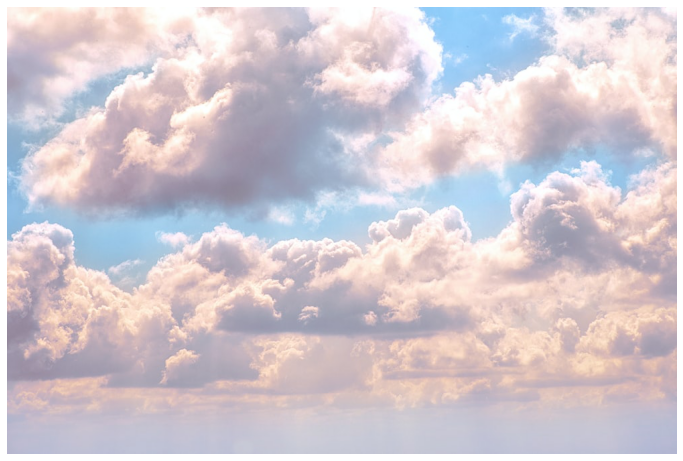

In [11]:
# Download an image and read it into a NumPy array, 
def download(url):
  name = url.split("/")[-1]
  image_path = tf.keras.utils.get_file(name, origin=url)
  img = image.load_img(image_path)
  return image.img_to_array(img)

# Scale pixels to between (-1.0 and 1.0)
def preprocess(img):
  return (img / 127.5) - 1
  
# Undo the preprocessing above
def deprocess(img):
  img = img.copy()
  img /= 2.
  img += 0.5
  img *= 255.
  return np.clip(img, 0, 255).astype('uint8')

# Display an image
def show(img):
  plt.figure(figsize=(12,12))
  plt.grid(False)
  plt.axis('off')
  plt.imshow(img)

# https://commons.wikimedia.org/wiki/File:Flickr_-_Nicholas_T_-_Big_Sky_(1).jpg
url = 'https://images.unsplash.com/photo-1501630834273-4b5604d2ee31?ixid=MXwxMjA3fDB8MHxzZWFyY2h8MXx8Y2xvdWRzfGVufDB8fDB8&ixlib=rb-1.2.1&w=1000&q=80'
img = preprocess(download(url))
print('Original Image')
show(img)
print('Processed image')
show(deprocess(img))

In [12]:
inception_v3 = tf.keras.applications.InceptionV3(weights='imagenet',
                                                 include_top=False)

87916544/87910968 [==============================] - 1s 0us/step


In [13]:
# We'll maximize the activations of these layers
names = ['mixed2', 'mixed3', 'mixed4', 'mixed5']
layers = [inception_v3.get_layer(name).output for name in names]

# Create our feature extraction model
feat_extraction_model = tf.keras.Model(inputs=inception_v3.input, outputs=layers)

In [14]:
def forward(img):
  
  # Create a batch
  img_batch = tf.expand_dims(img, axis=0)
  
  # Forward the image through Inception, extract activations
  # for the layers we selected above
  return feat_extraction_model(img_batch)

In [15]:
def calc_loss(layer_activations):
  
  total_loss = 0
  
  for act in layer_activations:
    
    # In gradient ascent, we'll want to maximize this value
    # so our image increasingly "excites" the layer
    loss = tf.math.reduce_mean(act)

    # Normalize by the number of units in the layer
    loss /= np.prod(act.shape)
    total_loss += loss

  return total_loss

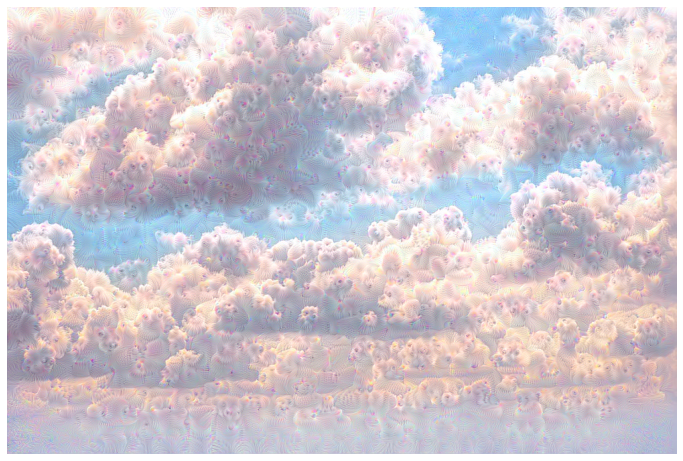

In [16]:
# Convert our image into a variable for training
img = tf.Variable(img)

# Run a few iterations of gradient ascent
steps = 400

for step in range(steps):
  
  with tf.GradientTape() as tape:    
    activations = forward(img)
    loss = calc_loss(activations)
    
  # How cool is this? It's the gradient of the 
  # loss (how excited the layer is) with respect to the
  # pixels of our random image!
  gradients = tape.gradient(loss, img)

  # Normalize the gradients
  gradients /= gradients.numpy().std() + 1e-8 
  
  # Update our image by directly adding the gradients
  # (because they're the same shape!)
  img.assign_add(gradients)
  
  if step % 50 == 0:
    clear_output()
    print ("Step %d, loss %f" % (step, loss))
    show(deprocess(img.numpy()))
    plt.show()

# Let's see the result
# Notice we're calling .numpy() here, which 
# takes us from TensorFlow land -> NumPy land
clear_output()
show(deprocess(img.numpy()))

# Using a CNN for sentiment analysis

In [17]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, preprocessing
import tensorflow_datasets as tfds
max_len = 200
n_words = 10000
dim_embedding = 256
EPOCHS = 20
BATCH_SIZE =500
def load_data():
    #load data
    (X_train, y_train), (X_test, y_test) = datasets.imdb.load_data(num_words=n_words)
    # Pad sequences with max_len
    X_train = preprocessing.sequence.pad_sequences(X_train, maxlen=max_len)
    X_test = preprocessing.sequence.pad_sequences(X_test, maxlen=max_len)
    return (X_train, y_train), (X_test, y_test)

In [18]:
def build_model():
    model = models.Sequential()
    # Input - Embedding Layer
    # the model will take as input an integer matrix of size     # (batch, input_length)
    # the model will output dimension (input_length, dim_embedding)
    # the largest integer in the input should be no larger
    # than n_words (vocabulary size).
    model.add(layers.Embedding(n_words, 
        dim_embedding, input_length=max_len))
    model.add(layers.Dropout(0.3))
    model.add(layers.Conv1D(256, 3, padding='valid', 
        activation='relu'))
    # takes the maximum value of either feature vector from each of     # the n_words features
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model
(X_train, y_train), (X_test, y_test) = load_data()
model=build_model()
model.summary()

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 256)          2560000   
_________________________________________________________________
dropout (Dropout)            (None, 200, 256)          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 198, 256)          196864    
_________________________________________________________________
global_max_pooling1d (Global (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [19]:
model.compile(optimizer = "adam", loss = "binary_crossentropy",
  metrics = ["accuracy"]
)
score = model.fit(X_train, y_train,
  epochs= EPOCHS,
  batch_size = BATCH_SIZE,
  validation_data = (X_test, y_test)
)
score = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/20
50/50 [==============================] - 9s 159ms/step - loss: 0.6810 - accuracy: 0.5538 - val_loss: 0.5041 - val_accuracy: 0.7752
Epoch 2/20
50/50 [==============================] - 8s 154ms/step - loss: 0.4444 - accuracy: 0.7995 - val_loss: 0.3052 - val_accuracy: 0.8686
Epoch 3/20
50/50 [==============================] - 8s 158ms/step - loss: 0.2565 - accuracy: 0.8987 - val_loss: 0.2690 - val_accuracy: 0.8870
Epoch 4/20
50/50 [==============================] - 8s 158ms/step - loss: 0.1635 - accuracy: 0.9418 - val_loss: 0.2725 - val_accuracy: 0.8887
Epoch 5/20
50/50 [==============================] - 8s 154ms/step - loss: 0.0940 - accuracy: 0.9717 - val_loss: 0.2879 - val_accuracy: 0.8902
Epoch 6/20
50/50 [==============================] - 8s 157ms/step - loss: 0.0504 - accuracy: 0.9887 - val_loss: 0.3349 - val_accuracy: 0.8856
Epoch 7/20
50/50 [==============================] - 8s 159ms/step - loss: 0.0274 - accuracy: 0.9954 - val_loss: 0.3549 - val_accuracy: 0.8869
Epoch 